In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Are Human TFs enriched for S vs the proteome?

In [4]:
tiled_proteome = pd.read_csv("../../AD_predictor_project/all_AD_predictor_files/AD_predictor/data/tiled_proteome.csv")
tiled_proteome["S"] = tiled_proteome["ProteinWindowSeq"].str.count("S")
tiled_proteome

,Unnamed: 0,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,L,K,R,D,E,Charge,AllHydros,S
0,0,MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISD,sp|Q00266|METK1_HUMAN S-adenosylmethionine syn...,0,39,0,2,0,2,1,0,5,3,-7,4,5
1,1,NGPVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDA,sp|Q00266|METK1_HUMAN S-adenosylmethionine syn...,1,40,0,2,0,2,1,0,5,3,-7,4,5
2,2,GPVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDAV,sp|Q00266|METK1_HUMAN S-adenosylmethionine syn...,2,41,0,2,0,2,1,0,5,3,-7,4,5
3,3,PVDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDAVL,sp|Q00266|METK1_HUMAN S-adenosylmethionine syn...,3,42,0,2,0,3,1,0,5,3,-7,5,5
4,4,VDGLCDHSLSEGVFMFTSESVGEGHPDKICDQISDAVLD,sp|Q00266|METK1_HUMAN S-adenosylmethionine syn...,4,43,0,2,0,3,1,0,6,3,-8,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24396402,24396402,RPEMDAPFWCNQGAACFFEGIDDVHWKENGTLVQVATIS,tr|A0A1B0GU22|A0A1B0GU22_HUMAN Uncharacterized...,32,71,2,3,0,1,1,1,3,3,-4,6,1
24396403,24396403,PEMDAPFWCNQGAACFFEGIDDVHWKENGTLVQVATISV,tr|A0A1B0GU22|A0A1B0GU22_HUMAN Uncharacterized...,33,72,2,3,0,1,1,0,3,3,-5,6,1
24396404,24396404,EMDAPFWCNQGAACFFEGIDDVHWKENGTLVQVATISVY,tr|A0A1B0GU22|A0A1B0GU22_HUMAN Uncharacterized...,34,73,2,3,1,1,1,0,3,3,-5,7,1
24396405,24396405,MDAPFWCNQGAACFFEGIDDVHWKENGTLVQVATISVYV,tr|A0A1B0GU22|A0A1B0GU22_HUMAN Uncharacterized...,35,74,2,3,1,1,1,0,3,2,-4,7,1


In [3]:
tiled_TFs = pd.read_csv("../../AD_predictor_project/all_AD_predictor_files/AD_predictor/data/tiled_lambert.csv")
tiled_TFs

,Unnamed: 0,ProteinWindowSeq,GeneName,StartPosition,EndPosition,A,I,L,M,V,...,S,T,D,E,R,H,K,G,P,Charge
0,0,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEA,sp|P23511|NFYA_HUMAN,0,39,4,2,1,1,4,...,3,4,0,3,0,0,0,3,0,-3
1,1,EQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQ,sp|P23511|NFYA_HUMAN,1,40,4,2,1,0,4,...,3,4,0,3,0,0,0,3,0,-3
2,2,QYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQV,sp|P23511|NFYA_HUMAN,2,41,4,2,1,0,5,...,3,4,0,2,0,0,0,3,0,-2
3,3,YTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVA,sp|P23511|NFYA_HUMAN,3,42,5,2,1,0,5,...,3,4,0,2,0,0,0,3,0,-2
4,4,TANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVAS,sp|P23511|NFYA_HUMAN,4,43,5,2,1,0,5,...,4,4,0,2,0,0,0,3,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881339,881339,FGKLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCD,sp|Q9Y5X4|NR2E3_HUMAN,367,406,1,3,10,1,0,...,1,3,1,3,3,0,3,2,2,2
881340,881340,GKLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDM,sp|Q9Y5X4|NR2E3_HUMAN,368,407,1,3,10,2,0,...,1,3,1,3,3,0,3,2,2,2
881341,881341,KLLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDMF,sp|Q9Y5X4|NR2E3_HUMAN,369,408,1,3,10,2,0,...,1,3,1,3,3,0,3,1,2,2
881342,881342,LLLLLPSLRFITAERIELLFFRKTIGNTPMEKLLCDMFK,sp|Q9Y5X4|NR2E3_HUMAN,370,409,1,3,10,2,0,...,1,3,1,3,3,0,3,1,2,2


In [10]:
max(tiled_proteome["S"])

39

In [11]:
max(tiled_TFs["S"])

29

In [19]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

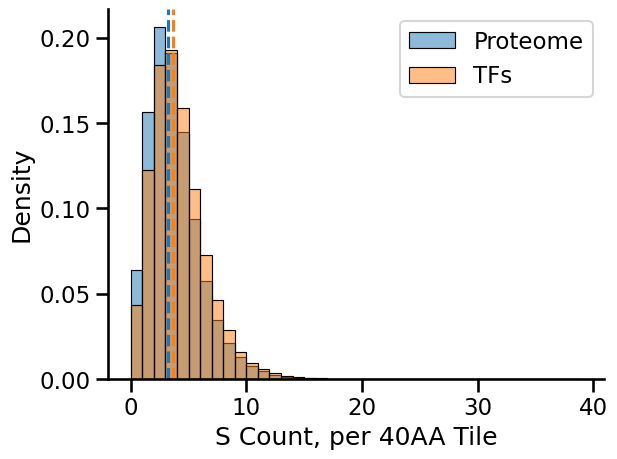

In [27]:
sns.set_context('talk')
bins = np.arange(40)
sns.histplot(tiled_proteome["S"], label = "Proteome", bins = bins, stat = 'density', alpha = 0.5)
sns.histplot(tiled_TFs["S"], label = "TFs", bins = bins, stat = 'density', alpha = 0.5)

plt.axvline(np.mean(tiled_proteome["S"]), color = sns.color_palette('tab10')[0], linestyle = '--')
plt.axvline(np.mean(tiled_TFs["S"]), color = sns.color_palette('tab10')[1], linestyle = '--')

plt.legend()
plt.xlabel("S Count, per 40AA Tile")
sns.despine()

In [17]:
from scipy import stats

In [18]:
stats.kstest(tiled_proteome["S"],
             tiled_TFs["S"])
#SIGNIFICANT

KstestResult(statistic=0.07659160773569407, pvalue=0.0, statistic_location=2, statistic_sign=1)